# 減衰振動

## Reference

- [【大学物理】力学入門⑩(減衰振動)【力学】](https://www.youtube.com/watch?v=uLkvOvw57Ms&ab_channel=%E4%BA%88%E5%82%99%E6%A0%A1%E3%81%AE%E3%83%8E%E3%83%AA%E3%81%A7%E5%AD%A6%E3%81%B6%E3%80%8C%E5%A4%A7%E5%AD%A6%E3%81%AE%E6%95%B0%E5%AD%A6%E3%83%BB%E7%89%A9%E7%90%86%E3%80%8D)
- [質量-ばね-ダンパーシステムの運動を求める](https://tajimarobotics.com/damped-mass-spring-system/)


## モデル

![](../resource/MSD-System.png)  
出典: [質量-ばね-ダンパーシステムの運動を求める](https://tajimarobotics.com/damped-mass-spring-system/)


## 運動方程式

$$
m\ddot{x} = -kx - c\dot{x}
$$

$-kx$はばねの復元力  
$b\dot{x}$はダンパーの抵抗力

## 微分方程式を解く

運動方程式を整理すると以下のような微分方程式となる

$$
\ddot{x} = -\omega_0^2 x - 2\gamma\dot{x}  \\
(\omega_0 = \sqrt{\frac{k}{m}}, \gamma=\frac{c}{2m})
$$

### 基本解を探す  
$x=e^{\lambda t}$を代入すると

$$
\lambda^2e^{\lambda t} = -\omega_0^2e^{\lambda t} - 2\gamma\lambda e^{\lambda t}
$$

$e^{\lambda t}$を払って式を整理する

$$
\lambda^2 + 2\gamma\lambda + \omega_0^2 = 0
$$

この$\lambda$について二次方程式と解くと

$$
\lambda = -\gamma \pm \sqrt{\gamma^2 -\omega_0^2} \\
$$

### 一般解を求める

#### 1. $\gamma > \omega_0$の場合

代数と戻すと以下のような不等式となる  

$$
\frac{c}{2m} > \sqrt{\frac{k}{m}}
$$

これは抵抗力が復元力より強いユースケースを表す


一般解は以下のようになる。  

$$
x = C_1e^{\lambda_1 t} + C_2 e^{\lambda_2 t}　\\
(C_1, C_2は定数)
$$

※ $\lambda$の2つの解を線形結合している

基本解より$\gamma > \sqrt{\gamma^2 -\omega_0^2}$は自明なため、$\lambda$は負の実数となる。  
つまり、上記の式はともに指数関数的に減衰する関数の和となる。  
このような運動及びシステムを"過減衰"と呼ぶ。  


##### 定数項の求め方

$C_1, C_2$は初期条件より連立方程式を立てて求める。

$$
\begin{equation}
\begin{split}
x(t) &= C_1e^{\lambda_1 t} + C_2 e^{\lambda_2 t}　\\
\dot{x}(t) &= C_1\lambda_1e^{\lambda_1 t} + C_2\lambda_2e^{\lambda_1 t} \\
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
x(0) &= C_1 + C_2　\\
\dot{x}(0) &= C_1\lambda_1 + C_2\lambda_2
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
C_1 &= \frac{\dot{x}(0) - x(0)\lambda_2}{\lambda_1 - \lambda_2}　\\
C_2 &= \frac{\dot{x}(0) - x(0)\lambda_1}{\lambda_2 - \lambda_1}　\\
\end{split}
\end{equation}
$$


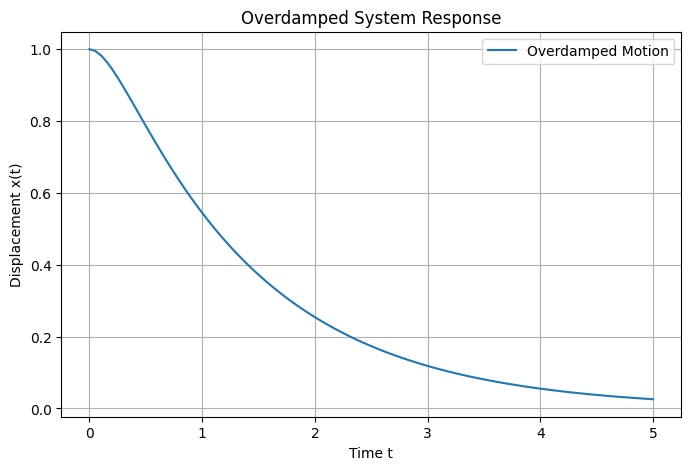

x(t) = -0.170820393249937*exp(-5.23606797749979*t) + 1.17082039324994*exp(-0.76393202250021*t)
C1 = 1.17082039324994
C2 = -0.170820393249937


In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def overdamped_solution(m, k, lambda_, x0, v0):
    # 定数の定義
    r1 = -lambda_ + sp.sqrt(lambda_**2 - k/m)
    r2 = -lambda_ - sp.sqrt(lambda_**2 - k/m)
    
    # C1, C2 を解く
    C1 = (v0 - x0 * r2) / (r1 - r2)
    C2 = (v0 - x0 * r1) / (r2 - r1)
    
    # 一般解
    t = sp.symbols('t')
    x_t = C1 * sp.exp(r1 * t) + C2 * sp.exp(r2 * t)
    
    return x_t, C1, C2, r1, r2

# パラメータ設定
m = 1.0  # 質量
k = 4.0  # ばね定数
lambda_ = 3.0  # 減衰パラメータ
x0 = 1.0  # 初期位置
v0 = 0.0  # 初期速度

# 解を求める
x_t, C1, C2, r1, r2 = overdamped_solution(m, k, lambda_, x0, v0)

# 数値計算用に関数化
t_vals = np.linspace(0, 5, 100)
x_vals = np.array([C1 * np.exp(float(r1) * t) + C2 * np.exp(float(r2) * t) for t in t_vals])

# グラフ描画
plt.figure(figsize=(8, 5))
plt.plot(t_vals, x_vals, label='Overdamped Motion')
plt.xlabel('Time t')
plt.ylabel('Displacement x(t)')
plt.title('Overdamped System Response')
plt.legend()
plt.grid()
plt.show()

# 結果の表示
print("x(t) =", x_t)
print("C1 =", C1)
print("C2 =", C2)


#### 2. $\gamma < \omega_0$の場合

代数と戻すと以下のような不等式となる。  

$$
\frac{c}{2m} < \sqrt{\frac{k}{m}}
$$

これは抵抗力が復元力より弱いユースケースを表す。

一般解より結果は虚数となるので、以下のように式変形する。  

$$
\begin{equation}
\begin{split}
\lambda &= -\gamma \pm \sqrt{\gamma^2 -\omega_0^2} \\
        &= -\gamma \pm i\omega \\
\\
(\omega &= \sqrt{\omega_0^2 - \gamma^2})
\end{split}
\end{equation}
$$

一般解は以下のようになる。  

$$
\begin{equation}
\begin{split}
x &= C_1e^{(-\gamma + i\omega) t} + C_2 e^{(-\gamma - i\omega) t}　\\
  &= e^{-\gamma t}(C_1e^{i\omega t} + C_2 e^{-i\omega t}) \\
(C_1, C_2は定数)
\end{split}
\end{equation}
$$

オイラーの公式$e^{-i\theta} = \cos\theta + i\sin\theta$より、

$$
\begin{equation}
\begin{split}
x &= e^{-\gamma t}\{(C_1+C_2)\cos(\omega t)+ i(C_1-C_2)\sin(\omega t)\}　\\
  &= e^{-\gamma t}\{A\cos(\omega t)+ B\sin(\omega t)\}　\\
  &= Ce^{-\gamma t}\cos(\omega t + \phi) \\
  \\
  (A=C_1+C_2, B=i(C_1-C2)) \\
  (C=\sqrt{A^2+B^2}, \tan\phi=-\frac{B}{A})
\end{split}
\end{equation}
$$

※三角関数の合成: $a\sin\theta + b\cos\theta = \sqrt{a^2 + b^2}\cos(\theta + \beta)$

$Ce^{-\gamma t}$は指数関数的に減衰する。  
$\cos(\omega t + \phi)$は振幅を表す。  
つまりこの場合は、振幅しながら減衰する運動をする。
このような運動を"減衰振動"と呼ぶ。  
またこのようなシステムを不足減衰システム（Underdamped Systeｍ）と呼ぶ。



##### 定数項の求め方

$A, B$は初期条件より連立方程式を立てて求める。

$$
\begin{equation}
\begin{split}
x(t) &= e^{-\gamma t}\{A\cos(\omega t)+ B\sin(\omega t)\}　\\
\dot{x}(t) &= -\gamma e^{-\gamma t}\{A\cos(\omega t)+ B\sin(\omega t)\} + e^{-\gamma t}\{-A\omega\sin(\omega t)+ B\omega\cos(\omega t)\}  \\
          &= -e^{-\gamma t}\{A\gamma\cos(\omega t)+ B\gamma\sin(\omega t) + A\omega\sin(\omega t)- B\omega\cos(\omega t)\} 
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
x(0) &= A　\\
\dot{x}(0) &= A\gamma + B\omega
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
A &= x(0)　\\
B &= \frac{\dot{x}(0) - \gamma x(0)}{\omega}　\\
\end{split}
\end{equation}
$$

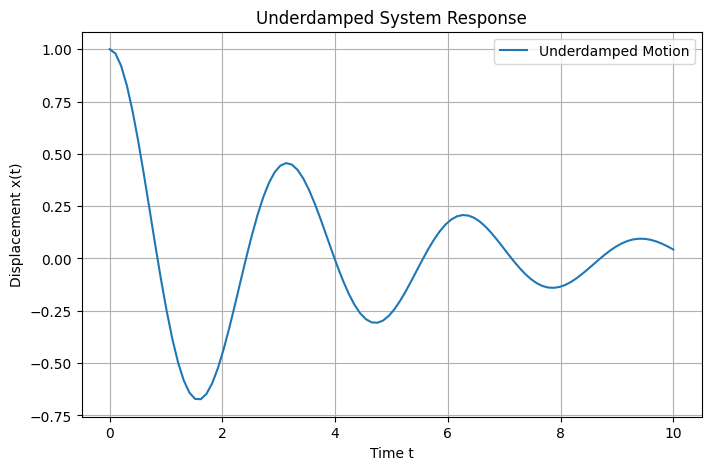

x(t) = (0.125*sin(2.0*t) + 1.0*cos(2.0*t))*exp(-0.25*t)
A = 1.0
B = 0.125000000000000
γ = 0.25
ω = 2.00000000000000


In [13]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def underdamped_solution(m, c, k, x0, v0):
    # パラメータの定義
    gamma = c / (2 * m)
    omega = sp.sqrt(k/m)  # 減衰振動の角振動数

    # 初期条件から A, B を求める
    A = x0
    B = (v0 + gamma * x0) / omega

    # 一般解のシンボリック表現
    t = sp.symbols('t')
    x_t = sp.exp(-gamma * t) * (A * sp.cos(omega * t) + B * sp.sin(omega * t))

    return x_t, A, B, gamma, omega

# パラメータ設定
m = 1.0  # 質量
c = 0.5  # 減衰係数
k = 4.0  # ばね定数
x0 = 1.0  # 初期位置
v0 = 0.0  # 初期速度

# 解を求める
x_t, A, B, gamma, omega = underdamped_solution(m, c, k, x0, v0)

# 数値計算用に関数化
t_vals = np.linspace(0, 10, 100)
x_vals = np.exp(-float(gamma) * t_vals) * (A * np.cos(float(omega) * t_vals) + B * np.sin(float(omega) * t_vals))

# グラフ描画
plt.figure(figsize=(8, 5))
plt.plot(t_vals, x_vals, label='Underdamped Motion')
plt.xlabel('Time t')
plt.ylabel('Displacement x(t)')
plt.title('Underdamped System Response')
plt.legend()
plt.grid()
plt.show()

# 結果の表示
print("x(t) =", x_t)
print("A =", A)
print("B =", B)
print("γ =", gamma)
print("ω =", omega)


#### 2. $\gamma = \omega_0$の場合

代数と戻すと以下のような等式となる。  

$$
\frac{c}{2m} = \sqrt{\frac{k}{m}}
$$

この時の解は$\lambda_1 = \lambda_2 = -\gamma$となる。

つまり、基本解を満たす解は $x = Ce^{-\gamma t}$

ただし、一般解は初期条件より2回微分方程式のため、任意定数2つ必要

CをC(t)と置いて解く(定数変化法)

$$
\begin{equation}
\begin{split}
\ddot{x} &= -\omega_0^2 x - 2\gamma\dot{x} \\
\ddot{C}e^{\gamma t} - 2\gamma\dot{C}e^{\gamma t} \gamma^2Ce^{\gamma t} &= \omega_0^2Ce^{\gamma t} + 2\gamma^2Ce^{\gamma t} - 2\gamma\dot{C}e^{\gamma t}
\\
\ddot{C} + C(\omega_0^2 - \gamma^2) &= 0 \\
\ddot{C} &= 0 \\
\dot{C} &= A \\ 
C &= At + B
\end{split}
\end{equation}
$$

よって、一般解は以下のようになる。  

$$
x = (At+B)e^{-\gamma t}
$$

このような運動及びシステムを"臨界減衰"と呼ぶ

臨界減衰は最も収束が早い運動となる  


##### 定数項の求め方

$A, B$は初期条件より連立方程式を立てて求める。

$$
\begin{equation}
\begin{split}
x &= (At+B)e^{-\gamma t}　\\
\dot{x} &= Ae^{-\gamma t} - \gamma(At+B)e^{-\gamma t}
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
x(0) &= B　\\
\dot{x}(0) &= A + B\gamma
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
A &= \dot{x}(0) + \gamma x(0)　\\
B &= x(0)　\\
\end{split}
\end{equation}
$$

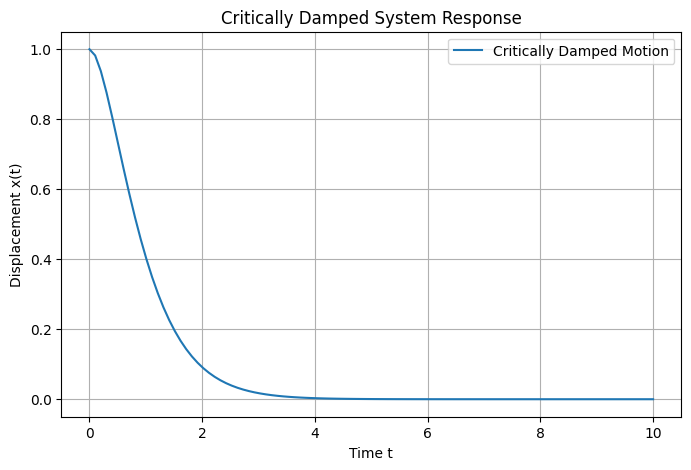

x(t) = (2.0*t + 1.0)*exp(-2.0*t)
A = 2.0
B = 1.0
γ = 2.0
ω = 0.0


In [11]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def critically_damped_solution(m, c, k, x0, v0):
    # パラメータの定義
    gamma = c / (2 * m)
    omega = sp.sqrt(k/m - gamma**2)  # 減衰振動の角振動数
    
    # 初期条件から A, B を求める
    A = v0 + gamma*x0
    B = x0

    # 一般解のシンボリック表現
    t = sp.symbols('t')
    x_t = (A*t + B) * sp.exp(-gamma * t)

    return x_t, A, B, gamma, omega

# パラメータ設定
m = 1.0  # 質量
c = 4.0  # 減衰係数
k = 4.0  # ばね定数
x0 = 1.0  # 初期位置
v0 = 0.0  # 初期速度

# 解を求める
x_t, A, B, gamma, omega = critically_damped_solution(m, c, k, x0, v0)

# 数値計算用に関数化
t_vals = np.linspace(0, 10, 100)
x_vals = (A * t_vals + B) * np.exp(-float(gamma) * t_vals)

# グラフ描画
plt.figure(figsize=(8, 5))
plt.plot(t_vals, x_vals, label='Critically Damped Motion')
plt.xlabel('Time t')
plt.ylabel('Displacement x(t)')
plt.title('Critically Damped System Response')
plt.legend()
plt.grid()
plt.show()

# 結果の表示
print("x(t) =", x_t)
print("A =", A)
print("B =", B)
print("γ =", gamma)
print("ω =", omega)
